# Decision trees

small demo of decision trees

In [1]:
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
plt.style.use("seaborn")  # for nicer looking plots

import sklearn.datasets
from sklearn.metrics import zero_one_loss

Let's load the [Iris](https://archive.ics.uci.edu/ml/datasets/iris) data set. That's a classic data set consisting data on 150 specimens of the iris flower. Each flower is represented by four characteristics, namely length of width of two types of leaves, sepal leaves and petal leaves. The target of the classification is the type of iris flower, of which there are three in this dataset: there is the flower Iris setosa, there is Iris versicolor and there is Iris virginica. Pictures can be found on the [wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set) page of the data set. 

The Iris data set has a major advantage: it's small, ie, you can rapidly run any number of tests on it. It also has a major disadvantage: it's small. That is, you can hardly do anything sophisticated with it, and all results will be subject to large statistical fluctuations. But it's a classic data set and you need to see it at least once. Also, the flowers are pretty.

In [2]:
iris=sklearn.datasets.load_iris()
X=iris.data
y=iris.target
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Let's get ourselves a decision tree instance.

In [3]:
from sklearn.tree import DecisionTreeClassifier
dectree=DecisionTreeClassifier()

In the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) you'll find a number of parameters for the decision tree class. 
Let's go through some of the options available. 

* criterion: the two options are “gini” and “entropy” (default: gini)
* max_depth: the maximum depth of the decision tree (default: infinity)
* min_samples_split: the minimum number of samples for an internal node to be split; in other words, a node that represents fewer datapoints will be a leaf (default: 2)
* min_samples_leaf: the minimum number of samples in a leaf (default: 1)

An unrestricted decision tree, that is allowed to grow to any depth, is normally a fairly poor classifier. We'll figure out later why that is the case.

For a proper evaluation, we should split off a test set. The data set, however, is so tiny (just 150 samples) that we use everything for traininig. As we only want to see how a decision tree works, this will be okay. 

In [4]:
dectree.fit(X,y)
train_err=zero_one_loss(y,dectree.predict(X))
print('training error: {:.3}%'.format(train_err*100))

training error: 0.0%


All samples correctly classified! This is actually not surprising: with default settings the decision tree is allowed to grow arbitrarily large and then can accommodate any training set. 

If we count the number of nodes in the tree we see that it is not small. (Recall that the data set is tiny!)

In [5]:
dectree.tree_.node_count  ## .tree_ accesses the underlying tree of the DecisionTreeClassifier

17

Let's also print out the depth of the tree:

In [6]:
dectree.tree_.max_depth

5

We can also plot the whole tree:

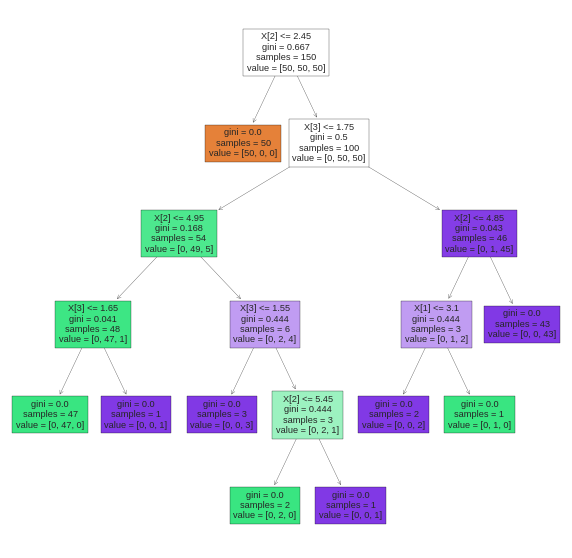

In [7]:
plt.subplots(figsize=(10,10))   
sklearn.tree.plot_tree(dectree,filled=True)
pass  ## the command pass does nothing. Here, it simply suppresses unwanted output.

What you should note here: many of the leaves represent very few data points (look at "samples = "). These leaves are basically exceptions that exist only to accommodate one or two data points. 

## Comparision of trees of different depth

Let's see what the effect of max_depth is on the training error.

In [8]:
# first let's put decision trees of depths running from 1 to 5 into a list
# the following code is called a "list comprehension", that's a intuitive way to define a list with content
dectrees_diff_depth=[DecisionTreeClassifier(max_depth=i) for i in range(1,6)]

# now let's fit all of the trees
for dt in dectrees_diff_depth:
    dt.fit(X,y)
    
# and let's compute their respective training errors
train_errs=[zero_one_loss(y,dt.predict(X)) for dt in dectrees_diff_depth]

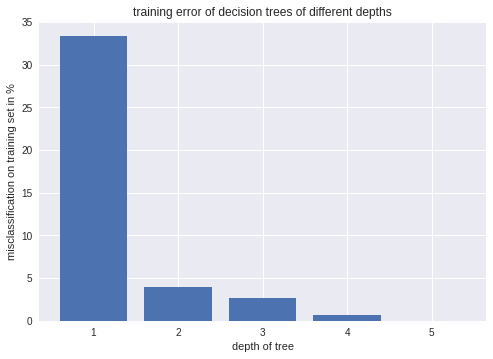

In [9]:
_,ax = plt.subplots() # the underscore _ is a valid name for a variable -- it's often used for a return value that we don't use
ax.bar(range(1,6),np.array(train_errs)*100)
ax.set_ylabel("misclassification on training set in %")
ax.set_xlabel("depth of tree")
ax.set_title("training error of decision trees of different depths")
plt.show()

As we can see a decision tree of depth 1 has very large training error, while depth 5 is sufficient to achieve 0 training error. That the training error decreases with increased depth is not at all suprising: the trees get larger and can represent more complex decision rules. 

## Decision boundaries

To plot the decision boundaries, we will restrict the training set to two features. 3d-plotting can very easily become confusing and don't get me started on 4d-plotting.

In [10]:
X_two_features=X[:,:2]  ## we take every row, but only the first two columns
X_two_features.shape # let's print the shape to make sure we didn't do anything wrong

(150, 2)

In [11]:
# code to plot decision boundary
# best to ignore this
resolution=500
L1=np.linspace(X_two_features[:,0].min()-0.1,X_two_features[:,0].max()+0.1,resolution)
L2=np.linspace(X_two_features[:,1].min()-0.1,X_two_features[:,1].max()+0.1,resolution)
XX,YY=np.meshgrid(L1,L2)

Let's fit again decision trees of different depths -- this time, however, we use the reduced training set with only two features.

In [12]:
# same as above
dectrees=[DecisionTreeClassifier(max_depth=i) for i in range(1,6)]
for dt in dectrees:
    dt.fit(X_two_features,y)

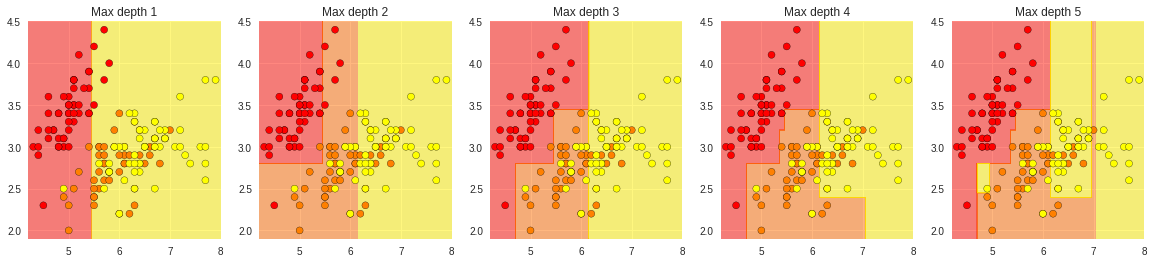

In [13]:
colourmap='autumn' # because it's autumn
_,axs=plt.subplots(1,5,figsize=(20,4))
for i,dt in enumerate(dectrees):
    Z=dt.predict(np.array([XX.flatten(),YY.flatten()]).T)
    Z=Z.reshape(XX.shape)
    axs[i].contourf(XX,YY,Z,alpha=0.5,cmap=colourmap)  # alpha controls opacity, but here only serves to fade out the colours a bit 
    axs[i].scatter(X_two_features[:,0],X_two_features[:,1],c=y,edgecolor='black',cmap=colourmap)
    axs[i].set_title('Max depth {}'.format(i+1))

What we see: A decision tree of depth 1 separates via an axis-parallel (affine) hyperplane. With more available depth the decision boundary becomes more complex.